# Example of Hypothesis Testing (T-Test) - Analyze Stroop Effect

__The objective in this notebook is to demonstrate hypothesis testing based on observation regarding the so called [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect).__

__Variables:__ 
- independent variable: word-colour combination (in two series, congruent and incongruent)
- dependent variable: time it takes participants to name the correct ink colors

__Set of hypothesis:__
- H0 (null hypothesis): there is no signifcant difference in the times it takes the participants to name the correct ink colors for the two sets. This means the two means for congruent and incongruent are the same: H0: μC = μI --> This hypothesis is to be nullified.
- H1 (alternative hypothsis): it takes the participants longer to name the correct ink colors for the incongruent set than for the congruent one. H1: μI > μC -->This hypothesis is to be tested.

Taking into account the experiment set-up and task, it makes no sense to test if the participants name the correct ink colors faster for the incongruent set than for the congruent one, so H1 is a directional hypothesis and I will use a *one-sided test* later on.

__Test statistic:__
We have less than 30 samples and don't know the population standard deviation, so I choose a t-test. As the 2 samples are collected from the same participants I will use a *paired / dependent 2-sample-t-test.*


### Load libraries, import data

In [23]:
import numpy as np
import pandas as pd
from scipy.stats import iqr
from scipy.stats import ttest_rel

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()   # sns.set_style('whitegrid')
%matplotlib inline

data = pd.read_csv('data/stroopdata.csv')

### EDA

In [4]:
display(data.head())
display(data.shape)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


(24, 2)

In [1]:
print(np.mean(data))
print('\n')
print(np.std(data, ddof=1))  # ddof set to get sample std
print('\n')
print(np.percentile(data['Congruent'], [25, 50, 75]))
print(np.percentile(data['Incongruent'], [25, 50, 75]))
print('\n')
print(iqr(data['Congruent'], axis=0))
print(iqr(data['Incongruent'], axis=0))

Congruent      14.051125
Incongruent    22.015917
dtype: float64


Congruent      3.559358
Incongruent    4.797057
dtype: float64


[ 11.89525  14.3565   16.20075]
[ 18.71675  21.0175   24.0515 ]


4.3055
5.33475


__Observations:__ Relatively big difference in means, whereas the difference in the measures of dispersion / variability isn't so big. This points to a significant difference between the values of the two sets.

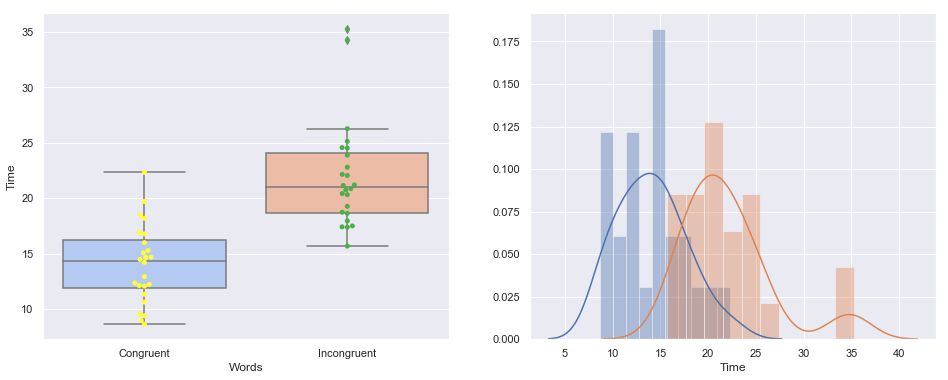

In [22]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)

_ = sns.swarmplot(data=data, palette="Set1_r")
_ = plt.xlabel('Words')
_ = plt.ylabel ('Time')

_ = sns.boxplot(data=data, palette="coolwarm")
_ = plt.xlabel('Words')
_ = plt.ylabel ('Time')

plt.subplot(1,2,2)

_ = sns.distplot(data['Congruent'], kde = True, bins = 10)
_ = sns.distplot(data['Incongruent'], kde = True, bins = 10)
_ = plt.xlabel('Time')

 __Observations:__
 
 - Boxplot (with swarmplot overlay) confirm descriptive statistics: The reaction times for the incongruent combinations are generally considerably higher than those of the congruent combinations. The inter-quartile ranges don't even overlap. Remarkable are two massive oultiers in the incongruent dataset.
 - Distplot shows that the data is more or less normally distributed, (although the two outliers mentioned above disturb the picture somewhat)

## Statistical Test 

In [25]:
# H0: Congruent = Incongruent
# H1: Incongruent > Congruent

ttest_result = ttest_rel(data['Incongruent'], data['Congruent'])

# check
ttest_result

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

In [26]:
# As scipy calculates a two-sided t-test by default, the calculated p-value, has to be halfed
print("p-value: ", ttest_result[1]/2)

p-value:  2.051500292855589e-08


I calculate with a standard confidence level of 95%, which means the significance level is 0.05. (And that again means: When I act as if there is an effect when p<0.05, in the long run I won't be wrong more than 5% of the time.)

__Conclusion:__ The resulting p-value of the t-test has to be lower than the siginificance level of 0.05 for H0 to be rejected. Indeed it is massivly smaller the the significance level. _H0 can be rejected for the given data, as had to be expected after the EDA._


(resources used [stackoverflow, answer three](https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy))


---